## **EJERCICIO PR√ÅCTICO TEXT MINING:**

### **Shared-task Profner: an√°lisis de textos para detectar y predecir menciones de profesiones en tweets.**

NOTA: Python Notebook realizado en Google Colab

In [6]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las √∫ltimas 5000 l√≠neas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/sub

Funciones de carga y preparaci√≥n de datos

In [7]:
import sys
import os
import pandas as pd
import numpy as np
def get_tweet_content(list_paths):
  """
    Funci√≥n para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categor√≠a de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

In [8]:
!pip install textacy
# Instalamos spacy y uno de sus modelos
!pip install spacy
# Descargamos modelos pre-entrenados de spacy en espa√±ol.
!python -m spacy download es_core_news_sm
# Instalamos imbalanced-learn para utilizar si librer√≠a SMOTE
!pip install imbalanced-learn

2023-10-27 16:20:05.974070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 16:20:05.974144: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 16:20:05.974179: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 16:20:05.983419: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 16:20:07.264667: W tensorflow/compiler/

# Ejercicio


En este ejercicio se trabajar√° con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el a√±o 2021. Espec√≠ficamente, se utilizar√°n los datos textuales de la subtarea 1, centrada en la clasificaci√≥n de textos. Este conjunto de datos son tweets en espa√±ol que tienen asignada una etiqueta num√©rica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu inter√©s, el proceso de obtenci√≥n, selecci√≥n y anotaci√≥n de datos est√° descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio deb√©is entrenar diferentes modelos de clasificaci√≥n que permitan clasificar correctamente los tweets. Para ello ser√° necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorizaci√≥n de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificaci√≥n. Los criterios de evaluaci√≥n del ejercicio ser√°n los siguientes:

-	**An√°lisis exploratorio, pre-procesado y normalizaci√≥n de los datos (30%)**:
        -	El ejercicio deber√° contener un an√°lisis exploratorio de los datos como n√∫mero de documentos, gr√°ficas de distribuci√≥n de longitudes y/o wordclouds, entre otros an√°lisis que se os pudieran ocurrir. Vuestros ejercicios deber√°n incorporar al menos los an√°lisis exploratorios vistos en clase.

    -	Tambi√©n tendr√©is que tener funciones para normalizar textos que permitan eliminar palabras vac√≠as, quitar s√≠mbolos de puntuaci√≥n y lematizar o hacer stemming.  

-	**Vectorizaci√≥n de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorizaci√≥n como TF-IDF y Word Embeddings. Tambi√©n hemos visto como incorporar caracter√≠sticas adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorizaci√≥n que quer√°is, pero:
  -	Si decid√≠s utilizar TF-IDF ser√° necesarios que incorpor√©is a modelo caracter√≠sticas adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librer√≠a TextBlob).
  -	Si opt√°is por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no ser√° necesario incorporar esas caracter√≠sticas adicionales. Si decid√≠s esta segunda opci√≥n, pod√©is utilizar los embeddings en espa√±ol que vimos en clase

-	**Entrenamiento y validaci√≥n del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendr√©is que testear al menos 3 modelos de clasificaci√≥n. El procedimiento debe ser similar al visto en clase, en el que primero estim√°bamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperpar√°metros.


## 0. Imports


In [9]:
 !pip install contractions
 #!pip install nltk

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import contractions
from tqdm.autonotebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

## 1. Obtenci√≥n del corpus
Para la obtenci√≥n de los datos teneis disponible la funci√≥n `get_profner_data()`. Esta funci√≥n prepara los datos del ejercicio en formato Pandas dataframe.

In [11]:
profner_path = "./profner/"
dataset = get_profner_data(profner_path)

In [12]:
dataset.head(10)

tweet_id                                         tweet_text  \
0  1256007275807997953  CHINA: libera una pandemia EE.UU: libera OVNIS...   
1  1257909427677601792  San Francisco (EEUU) hace 100 a√±os tras vivir ...   
2  1281580572415066112  Porfi poneos la mascarilla o tendremos 28 nuev...   
3  1271348112733470720  El nuevo ‚Äûcovid normas y reglas recibimiento‚Äú ...   
4  1270421287148695556  Si el confinamiento ha dejado algo tocada tu e...   
5  1266846025576218626  Lo nunca visto, aqui en Espa√±a, por lo q se ve...   
6  1276842713858502663  #Coronavirus: un nuevo estudio descubre que ta...   
7  1270064252234215424  Esto ser√° vestigio arqueol√≥gico del pelotazo a...   
8  1252741192577581056  Repartidores teniendo que trabajar en medio de...   
9  1260266403409670144  @carlesenric @salvadorilla Es imprescindible d...   

   label    set  
0      0  train  
1      0  train  
2      0  train  
3      0  train  
4      0  train  
5      0  train  
6      0  train  
7      0  train  
8      1  train  
9      1  train

## 2. An√°lisis exploratorio (EDA)

En este apartado pretendemos realizar un an√°lisis de los datos previo a la normalizaci√≥n de los mismos. Este an√°lisis nos va a permitir extraer informaci√≥n relevante del dataset, as√≠ como posibles inconvenientes que ser√°n solucionados llegado el caso.

* **N√∫mero de documentos y columnas:**

Comenzamos mostrando el n√∫mero de documentos, o lo que es lo mismo, el n√∫mero de filas del data frame:


In [13]:
print("Tenemos un conjunto de {} documentos".format(len(dataset)))
print("El dataset tiene {} columnas".format(dataset.shape[1]))

Tenemos un conjunto de 8000 documentos
El dataset tiene 4 columnas


* **N√∫mero de documentos duplicados:**

Despues, comprobamos y eliminamos las filas con alg√∫n valor vac√≠o (NA) y quitaremos los duplicados.


In [14]:
print("Existen {} tweets duplicados".format(np.sum(dataset.duplicated(subset=["tweet_text"]))))
# Quitaremos esos duplicados
dataset = dataset.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} tweets".format(dataset.shape[0]))

Existen 0 tweets duplicados
Despues de quitar duplicados tenemos un conjunto de 8000 tweets


In [15]:
print("Existen {} id_tweets duplicados".format(np.sum(dataset.duplicated(subset=["tweet_id"]))))


Existen 0 id_tweets duplicados


Comprobaramos que no hayan quedado Nulls en ningunas de las 4 columnas del dataset:

In [16]:
# Nulos totales en el dataset:
dataset.isnull().sum().sum()

0

In [17]:
# Nulos totales por columna (en este caso no har√≠a falta porque no hay nulos en todo el dataset):
print("Hay {} valores vac√≠os en los id_tweets, {} valores vac√≠os en los tweets, {} valores vac√≠os en las etiquetas en los datos y {} valores vac√≠os en columna de train_test".format(np.sum(dataset.isnull())[0],
                                                                                                                                                                                        np.sum(dataset.isnull())[1],
                                                                                                                                                                                          np.sum(dataset.isnull())[2],
                                                                                                                                                                                            np.sum(dataset.isnull())[3]))

Hay 0 valores vac√≠os en los id_tweets, 0 valores vac√≠os en los tweets, 0 valores vac√≠os en las etiquetas en los datos y 0 valores vac√≠os en columna de train_test


* **N√∫mero de documentos por cada set:**

Contamos el n√∫mero de documentos que pertenecen al set de train/valid

In [18]:
print(dataset['set'].value_counts())

# N√∫mero de elementos de cada set:
dataset.groupby(['set']).count()

train    6000
valid    2000
Name: set, dtype: int64


tweet_id  tweet_text  label
set                               
train      6000        6000   6000
valid      2000        2000   2000

* **N√∫mero de documentos por cada clase:**

Contamos el n√∫mero de elementos de cada clase, esto se hace muy f√°cil con un groupby de la columna 'label' y un conteo posterior. Tambi√©n se puede hacer con un value_counts sobre la serie de la etiqueta.

In [19]:
print(dataset["label"].value_counts())

# N√∫mero de elementos de cada clase:
dataset.groupby(['label']).count()

0    6130
1    1870
Name: label, dtype: int64


tweet_id  tweet_text   set
label                            
0          6130        6130  6130
1          1870        1870  1870

Observamos que no tenemos un dataset muy balanceado, ya que tenemos aproximadamente 6000 tweets en los que NO se menciona a profesionales (valor 0), frente a solo aproximadamente 2000 tweets en los que S√ç se menciona a profesionales (valor 1).

¬°¬°Esto nos puede dar problemas en el entrenamiento de los modelos!! üòû Por lo que tendremos que balancearlo nosotros m√°s adelante (y solo en el set de train)


Vamos a dibujar un histograma con las clases:

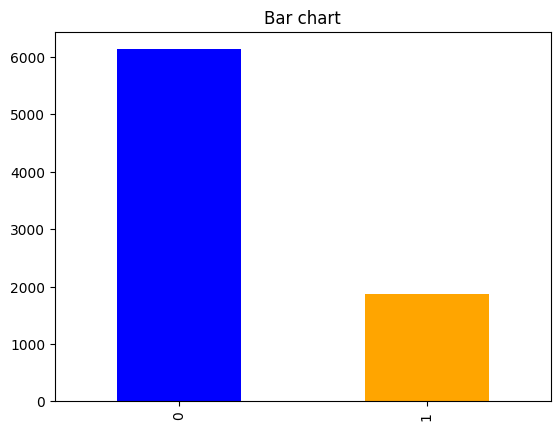

In [20]:
ax, fig = plt.subplots()
etiquetas = dataset.label.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

* **Distribuci√≥n de la longitud de los tweet en caracteres:**

Para seguir con el an√°lisis exploratorio, vamos a hacer un c√°lculo t√≠pico: la longitud de cada uno de los textos de los documentos para despues dibujar su histograma.

In [21]:
# Comenzamos creando las columnas que van a almacenar las longitud en caracteres y en tokens de los documentos del corpus:

dataset["char_len"] = dataset["tweet_text"].apply(lambda x: len(x))

<ipython-input-22-087812f4009a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(dataset[dataset["label"]==0].char_len, hist=True, label="no profesion")
<ipython-input-22-087812f4009a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(dataset[dataset["label"]==1].char_len, hist=True

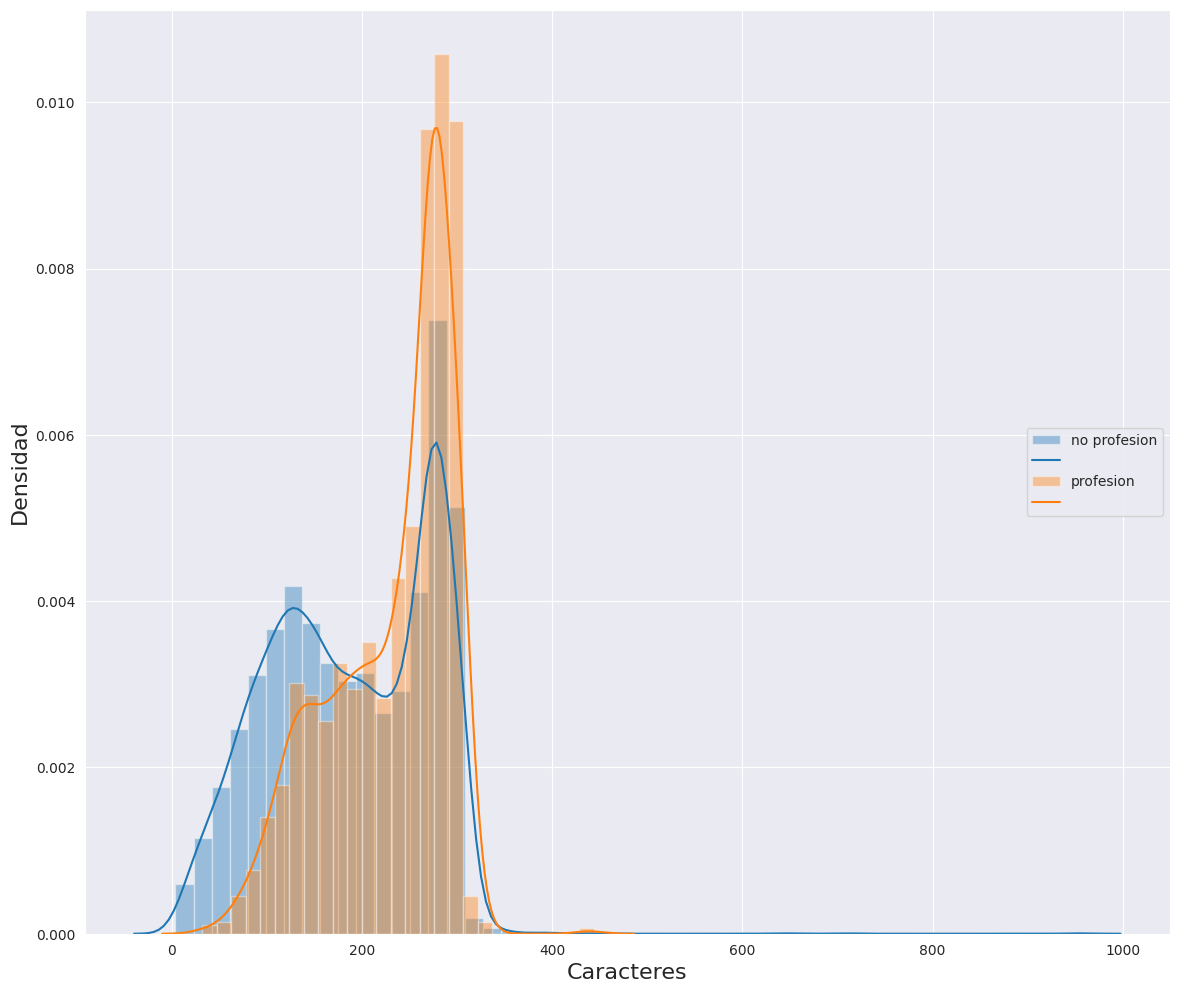

In [22]:
# Importamos las librer√≠as matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# a√±adimos series para cada categor√≠a (eligiendo la ser√≠e de char_len
plt1 = sns.distplot(dataset[dataset["label"]==0].char_len, hist=True, label="no profesion")
plt2 = sns.distplot(dataset[dataset["label"]==1].char_len, hist=True, label="profesion")
plt.legend(labels=['no profesion',"",'profesion',""], loc = 5)


# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gr√°fico:
plt.show()


Vemos que las distribuciones de longitud de los tweets cambian en funci√≥n de si mencionan profesiones o no, aunque ambas etiquetas siguen m√°s o menos la misma distribuci√≥n.

Esto hace que, al no haber separaci√≥n de las variables por longitud, no podremos entrenar un "clasificador" teniendo en cuenta √∫nicamente una regla de la longitud de los tweets (como p.ej. `if len(noticia)>50 "noprof" else "prof"`)

Esto significa que una vez que tengamos los textos representados num√©ricamente, haremos sobre el set de TRAIN la t√©cnica SMOTE (librer√≠a imblearn, imbalanced learn), que lo que hace es duplicar de forma inteligente algunos registros para que el dataset est√© balanceado a nivel de labels.

**Como no hemos podido deducir nada del gr√°fico anterior √∫nicamente utilizando el n√∫mero de caracteres, podemos utilizar el n√∫mero de adjetivos, ya que adem√°s, estamos ante un caso e Twitter** (mismo n√∫mero de adjetivos en una categor√≠a y otra)

## 3. Preprocesado y Normalizaci√≥n

Vamos a proceder a normalizar los datos. Para ello vamos a generar peque√±as funciones que nos permitan:
- Eliminar espacios extra.
- Transformar a min√∫sculas.
- Tokenizar.
- Reemplazar contractions.
- Lematizar tokens.
- Eliminar stopwords.
- Eliminar s√≠gnos de puntuaci√≥n.

In [23]:

# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

# Tokenizador
from nltk.tokenize import TweetTokenizer     # utilizamos un tokenizador especial para tweets porque el resto no funcionan bien con este formato
def tokenization(text):
  tokenizer = TweetTokenizer()
  tokens = tokenizer.tokenize(text)
  return tokens


# Reemplazar contractions usando la librer√≠a "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    expanded_words = []
    for t in text.split():
        expanded_words.append(contractions.fix(t))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Quitar stop words
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuaci√≥n (nos quedamos s√≥lo lo alfanum√©rico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  #disable desabilita algunos de los elementos del pipeline de spacy para que no se ejecute y as√≠ no tarde tanto
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

# Stemming
import string
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens

Podr√≠amos generar una funci√≥n de transformaci√≥n que aglutinara todas las anteriores y pas√°rsela al siguiente paso (TfidfVectorizer) en el campo analyzer. Para ver el proceso de cada uno de los pasos lo haremos paso a paso:


In [24]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

# Espacios
dataset["normaliza"] = dataset['tweet_text'].progress_apply(lambda x: eliminar_espacios(x))
# To Lower. Pasa a minusculas las letras.
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: texto_to_lower(x))
# Contracciones: en este dataset no es necesario porque no estamos tratando con textos en ingl√©s
#dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: replace_contraction(x))
# Tokenizar
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: tokenization(x))
# Quitar Stopwords. Tokens que no nos aportan valor a nuestro modelo, por ejemplo preposiciones, conjunciones, pronombre personales.
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_stopwords(x))
# Quitar puntuaci√≥n
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_puntuacion(x))
# Lematizaci√≥n (mediante spacy) Aqui vamos a hacer las formas canonicas, reducimos la variabilidad de palabras.
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: lematizar(x))

# Stemming tardar√≠a menos que lemmatization pero es menos eficaz
#dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: stem(x))



# Tokenizar de nuevo porque el formato de token se ha perdido en el proceso
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: tokenization(x))

dataset["normaliza"]




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

0       [china, libera, pandemia, libera, ovnis, argen...
1       [san, francisco, eeuu, hace, 100, a√±os, tras, ...
2       [porfi, poneo, mascarilla, 28, nuevas, cancion...
3       [nuevo, covid, normas, reglas, recibimiento, c...
4       [si, confinamiento, dejado, tocada, estabilida...
                              ...                        
7995    [nuevos, infectado, coronavirus, multiplican, ...
7996    [ayuso, adjudica, dedo, contrato, euros, hacer...
7997    [mese, encerrado, puede, viajar, provincia, ir...
7998    [gobierno, proh√≠be, ley, lis, despidos, crisis...
7999                       [rasgos, psicol√≥gicos, llevas]
Name: normaliza, Length: 8000, dtype: object

In [25]:
# Funci√≥n para eliminar tokens muy peque√±os:
def eliminate_short_tokens(tokens):
  lista_out = [token for token in tokens if len(token)>2]
  return lista_out


dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: eliminate_short_tokens(x))

dataset["normaliza"]

  0%|          | 0/8000 [00:00<?, ?it/s]

0       [china, libera, pandemia, libera, ovnis, argen...
1       [san, francisco, eeuu, hace, 100, a√±os, tras, ...
2       [porfi, poneo, mascarilla, nuevas, cancione, a...
3       [nuevo, covid, normas, reglas, recibimiento, c...
4       [confinamiento, dejado, tocada, estabilidad, m...
                              ...                        
7995    [nuevos, infectado, coronavirus, multiplican, ...
7996    [ayuso, adjudica, dedo, contrato, euros, hacer...
7997    [mese, encerrado, puede, viajar, provincia, re...
7998    [gobierno, proh√≠be, ley, lis, despidos, crisis...
7999                       [rasgos, psicol√≥gicos, llevas]
Name: normaliza, Length: 8000, dtype: object

<ipython-input-26-99899e61d450>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(dataset[dataset["label"]==0]["token_len"], hist=True, label="no profesion")
<ipython-input-26-99899e61d450>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(dataset[dataset["label"]==1]["token_len"], h

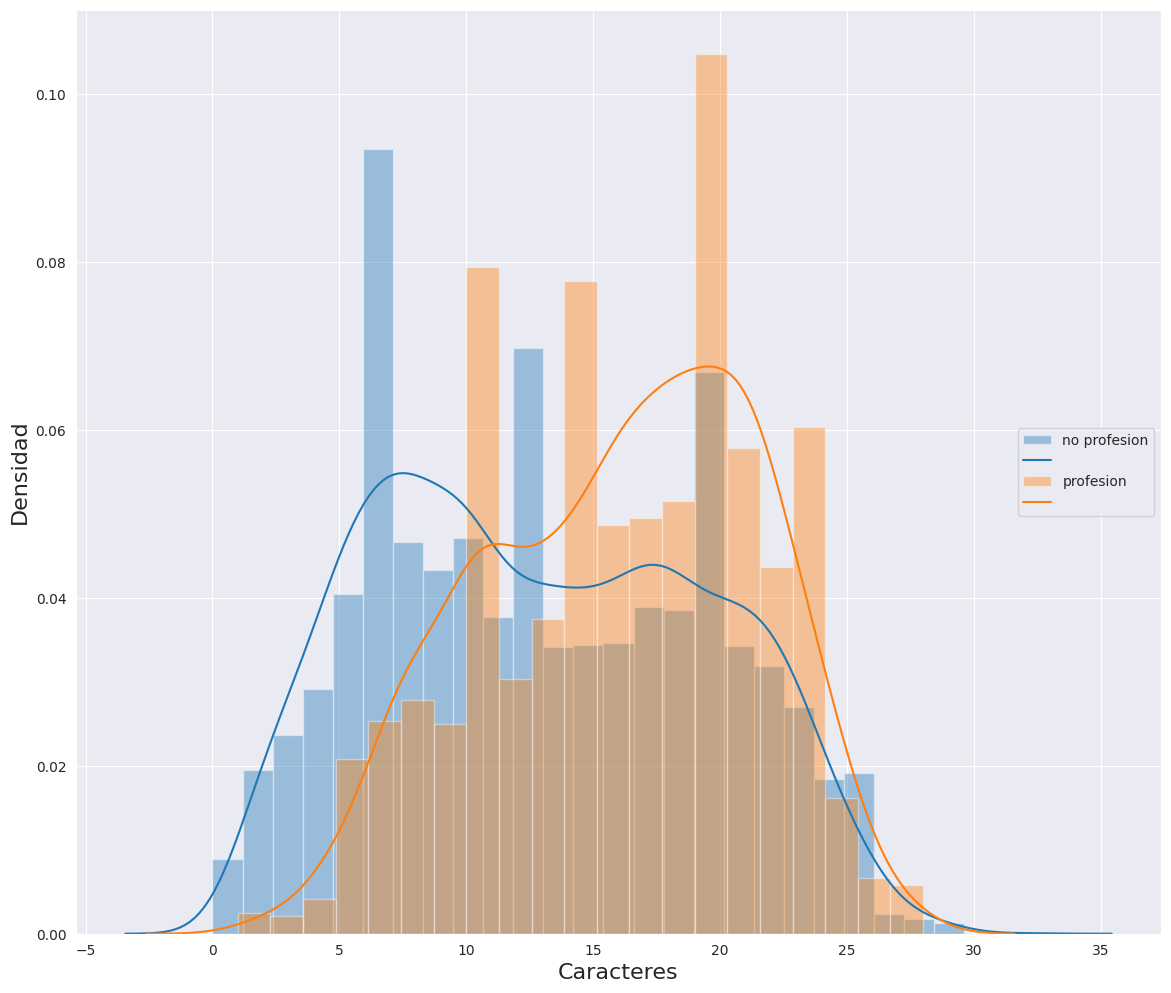

In [26]:
dataset["token_len"] = dataset["normaliza"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
plt1 = sns.distplot(dataset[dataset["label"]==0]["token_len"], hist=True, label="no profesion")
plt2 = sns.distplot(dataset[dataset["label"]==1]["token_len"], hist=True, label="profesion")
plt.legend(labels=['no profesion',"",'profesion',""], loc = 5)

# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

plt.show()

Como ya ve√≠amos antes, las dos distribuciones de tweets (con y sin menciones de profesiones) son muy parecidas, por lo que no podemos diferenciarlas solo por la longitud de los tweets o la longitud de los tokens una vez normalizados.

In [27]:
dataset.head()

tweet_id                                         tweet_text  \
0  1256007275807997953  CHINA: libera una pandemia EE.UU: libera OVNIS...   
1  1257909427677601792  San Francisco (EEUU) hace 100 a√±os tras vivir ...   
2  1281580572415066112  Porfi poneos la mascarilla o tendremos 28 nuev...   
3  1271348112733470720  El nuevo ‚Äûcovid normas y reglas recibimiento‚Äú ...   
4  1270421287148695556  Si el confinamiento ha dejado algo tocada tu e...   

   label    set  char_len                                          normaliza  \
0      0  train        87  [china, libera, pandemia, libera, ovnis, argen...   
1      0  train        90  [san, francisco, eeuu, hace, 100, a√±os, tras, ...   
2      0  train        95  [porfi, poneo, mascarilla, nuevas, cancione, a...   
3      0  train       225  [nuevo, covid, normas, reglas, recibimiento, c...   
4      0  train       138  [confinamiento, dejado, tocada, estabilidad, m...   

   token_len  
0          9  
1         10  
2          8  
3         19  
4         13

Se ha hecho el preprocesado, y antes de introducirlo a TFIDF vamos a generar una frase de cada una de las listas de tokens, para utilizar el propio tokenizador de TFIDF.

In [28]:
# Podemos agregar espacios entre los tokens para juntar todos los tokens en una sola lista -> columna nueva "clean_text" para utilizar en el vectorizador
dataset["clean_text"] = dataset["normaliza"].progress_apply(lambda x: " ".join(x))
dataset["clean_text"]

  0%|          | 0/8000 [00:00<?, ?it/s]

0       china libera pandemia libera ovnis argentina l...
1       san francisco eeuu hace 100 a√±os tras vivir pa...
2       porfi poneo mascarilla nuevas cancione artista...
3       nuevo covid normas reglas recibimiento comerci...
4       confinamiento dejado tocada estabilidad mental...
                              ...                        
7995    nuevos infectado coronavirus multiplican casi ...
7996    ayuso adjudica dedo contrato euros hacer v√≠deo...
7997    mese encerrado puede viajar provincia restaura...
7998    gobierno proh√≠be ley lis despidos crisis coron...
7999                           rasgos psicol√≥gicos llevas
Name: clean_text, Length: 8000, dtype: object

In [29]:
dataset.head()


tweet_id                                         tweet_text  \
0  1256007275807997953  CHINA: libera una pandemia EE.UU: libera OVNIS...   
1  1257909427677601792  San Francisco (EEUU) hace 100 a√±os tras vivir ...   
2  1281580572415066112  Porfi poneos la mascarilla o tendremos 28 nuev...   
3  1271348112733470720  El nuevo ‚Äûcovid normas y reglas recibimiento‚Äú ...   
4  1270421287148695556  Si el confinamiento ha dejado algo tocada tu e...   

   label    set  char_len                                          normaliza  \
0      0  train        87  [china, libera, pandemia, libera, ovnis, argen...   
1      0  train        90  [san, francisco, eeuu, hace, 100, a√±os, tras, ...   
2      0  train        95  [porfi, poneo, mascarilla, nuevas, cancione, a...   
3      0  train       225  [nuevo, covid, normas, reglas, recibimiento, c...   
4      0  train       138  [confinamiento, dejado, tocada, estabilidad, m...   

   token_len                                         clean_text  
0          9  china libera pandemia libera ovnis argentina l...  
1         10  san francisco eeuu hace 100 a√±os tras vivir pa...  
2          8  porfi poneo mascarilla nuevas cancione artista...  
3         19  nuevo covid normas reglas recibimiento comerci...  
4         13  confinamiento dejado tocada estabilidad mental...

## 4. Vectorizaci√≥n


Como vamos a utilizar el vector TF-IDF, ser√° necesario que incorporemos al modelo caracter√≠sticas adicionales de sentimiento -> Utilizaremos la librer√≠a Spanish Emotion Lexicon (SEL), que contiene 2036 palabras clasificadas en 6 estados de √°nimo diferente.



In [30]:
# Nos descargamos los datos de la web de Grigori Sidorov.
url_path = "https://www.cic.ipn.mx/~sidorov/SEL.txt"
sel_lexicon = pd.read_csv(url_path,sep="\t", encoding="latin-1")

In [31]:
# La categor√≠a "Alegr√≠a" y "Sorpresa" se mapear√°n a "positive" y el resto a "negative":
dicc_mapping = {"Alegr√≠a":"positive",
                "Sorpresa":"positive",
                "Tristeza":"negative",
                "Enojo":"negative",
                "Miedo":"negative",
                "Repulsi√≥n":"negative"}

sel_lexicon["Categor√≠a"] = sel_lexicon["Categor√≠a"].map(dicc_mapping)

In [32]:
# Hacemos dos categorias una con positiva y otra con negativa.
positive_words = dict(zip(sel_lexicon[sel_lexicon["Categor√≠a"]=="positive"].Palabra, sel_lexicon[sel_lexicon["Categor√≠a"]=="positive"][' PFA']))
negative_words = dict(zip(sel_lexicon[sel_lexicon["Categor√≠a"]=="negative"].Palabra, sel_lexicon[sel_lexicon["Categor√≠a"]=="negative"][' PFA']))

In [33]:
def calculate_sentiment(frase, positive_words, negative_words):
  """
  Funci√≥n para calcular el score de sentimiento de una frase

  Args:
    frase [str]: Frase pre-preprocesada en espa√±ol. Debe venir lematizada.
    positive_words [dict]: Diccionario de palabras positivas extraidas de SEL
    negative_words [dict]: Diccionario de palabras negativas extra√≠das de SEL

  Out:
    Sentiment score
  """
  score = 0
  for i in frase.split():
    if i in positive_words:
      score = score + float(positive_words[i])
    elif i in negative_words:
      score = score - float(negative_words[i])
    else:
      score = score + 0

  return score


In [34]:
# Creamos una lista para almacenar los resultados de sentimiento
sentimientos = []

# Aplicamos la funci√≥n para calcular el score del sentimiento a cada texto
for texto in dataset["clean_text"]:
    valor_sentimiento = calculate_sentiment(texto, positive_words, negative_words)
    sentimientos.append(valor_sentimiento)

# Agregamos los resultados de sentimiento como una nueva columna en el DataFrame
dataset['sentimiento'] = sentimientos

dataset.head(10)

tweet_id                                         tweet_text  \
0  1256007275807997953  CHINA: libera una pandemia EE.UU: libera OVNIS...   
1  1257909427677601792  San Francisco (EEUU) hace 100 a√±os tras vivir ...   
2  1281580572415066112  Porfi poneos la mascarilla o tendremos 28 nuev...   
3  1271348112733470720  El nuevo ‚Äûcovid normas y reglas recibimiento‚Äú ...   
4  1270421287148695556  Si el confinamiento ha dejado algo tocada tu e...   
5  1266846025576218626  Lo nunca visto, aqui en Espa√±a, por lo q se ve...   
6  1276842713858502663  #Coronavirus: un nuevo estudio descubre que ta...   
7  1270064252234215424  Esto ser√° vestigio arqueol√≥gico del pelotazo a...   
8  1252741192577581056  Repartidores teniendo que trabajar en medio de...   
9  1260266403409670144  @carlesenric @salvadorilla Es imprescindible d...   

   label    set  char_len                                          normaliza  \
0      0  train        87  [china, libera, pandemia, libera, ovnis, argen...   
1      0  train        90  [san, francisco, eeuu, hace, 100, a√±os, tras, ...   
2      0  train        95  [porfi, poneo, mascarilla, nuevas, cancione, a...   
3      0  train       225  [nuevo, covid, normas, reglas, recibimiento, c...   
4      0  train       138  [confinamiento, dejado, tocada, estabilidad, m...   
5      0  train       280  [nunca, visto, aqui, espa√±a, resucitan, vez, v...   
6      0  train       215  [nuevo, estudio, descubre, paciente, covid, si...   
7      0  train        84  [vestigio, arqueol√≥gico, pelotazo, d√≠a, siguie...   
8      1  train       190  [repartidore, trabajar, medio, pandemia, encer...   
9      1  train       245  [imprescindible, desescalada, criterio, sanita...   

   token_len                                         clean_text  sentimiento  
0          9  china libera pandemia libera ovnis argentina l...        0.000  
1         10  san francisco eeuu hace 100 a√±os tras vivir pa...        0.630  
2          8  porfi poneo mascarilla nuevas cancione artista...        0.000  
3         19  nuevo covid normas reglas recibimiento comerci...        0.000  
4         13  confinamiento dejado tocada estabilidad mental...        0.000  
5         20  nunca visto aqui espa√±a resucitan vez veo meno...       -0.563  
6         12  nuevo estudio descubre paciente covid sintom√°t...       -0.630  
7          7  vestigio arqueol√≥gico pelotazo d√≠a siguiente c...        0.000  
8         15  repartidore trabajar medio pandemia encerrado ...        0.000  
9         17  imprescindible desescalada criterio sanitario ...        0.000

In [35]:
# Definimos la variable de categor√≠as:
dataset['label'] = dataset["label"].values.astype(np.float32)

dataset.dtypes

tweet_id         int64
tweet_text      object
label          float32
set             object
char_len         int64
normaliza       object
token_len        int64
clean_text      object
sentimiento    float64
dtype: object

In [36]:
# Separar entre set train/valid porque queremos un vectorizador para cada conjunto (si no, luego el vector_data no lo podemos dividir en train/valid seg√∫n el set)
Train = dataset[dataset['set']=='train']
Train['set'].value_counts()

train    6000
Name: set, dtype: int64

In [37]:
Train.head()

tweet_id                                         tweet_text  \
0  1256007275807997953  CHINA: libera una pandemia EE.UU: libera OVNIS...   
1  1257909427677601792  San Francisco (EEUU) hace 100 a√±os tras vivir ...   
2  1281580572415066112  Porfi poneos la mascarilla o tendremos 28 nuev...   
3  1271348112733470720  El nuevo ‚Äûcovid normas y reglas recibimiento‚Äú ...   
4  1270421287148695556  Si el confinamiento ha dejado algo tocada tu e...   

   label    set  char_len                                          normaliza  \
0    0.0  train        87  [china, libera, pandemia, libera, ovnis, argen...   
1    0.0  train        90  [san, francisco, eeuu, hace, 100, a√±os, tras, ...   
2    0.0  train        95  [porfi, poneo, mascarilla, nuevas, cancione, a...   
3    0.0  train       225  [nuevo, covid, normas, reglas, recibimiento, c...   
4    0.0  train       138  [confinamiento, dejado, tocada, estabilidad, m...   

   token_len                                         clean_text  sentimiento  
0          9  china libera pandemia libera ovnis argentina l...         0.00  
1         10  san francisco eeuu hace 100 a√±os tras vivir pa...         0.63  
2          8  porfi poneo mascarilla nuevas cancione artista...         0.00  
3         19  nuevo covid normas reglas recibimiento comerci...         0.00  
4         13  confinamiento dejado tocada estabilidad mental...         0.00

In [38]:
Valid = dataset[dataset['set']=='valid']
Valid['set'].value_counts()

valid    2000
Name: set, dtype: int64

In [39]:
Valid.head()

tweet_id                                         tweet_text  \
6000  1279974120902590466  @JimmieJohnson result√≥ positivo en la prueba d...   
6001  1282343525078663168  #Mundo: El Reino Unido podr√≠a empezar a implem...   
6002  1278069425472704512  üáµüá™ | URGENTE - CORONAVIRUS: Per√∫ reporta 2848 ...   
6003  1274677343680946176  Las limpiadoras de hospitales son las olvidada...   
6004  1270626757327151105  üí°Carina, el chatbot desarrollado por @1_millio...   

      label    set  char_len  \
6000    0.0  valid       143   
6001    0.0  valid       215   
6002    0.0  valid        76   
6003    1.0  valid       276   
6004    0.0  valid       211   

                                              normaliza  token_len  \
6000  [result√≥, positivo, prueba, covid, correr√°, do...         11   
6001  [reino, unido, podr√≠a, empezar, implementar, v...         17   
6002  [urgente, coronavirus, per√∫, reporta, 2848, ca...          8   
6003  [limpiadora, hospitale, olvidada, covid, d√≠as,...         16   
6004  [carina, chatbot, desarrollado, proporcionar, ...         15   

                                             clean_text  sentimiento  
6000  result√≥ positivo prueba covid correr√° domingo ...        0.000  
6001  reino unido podr√≠a empezar implementar vacuna ...        0.000  
6002  urgente coronavirus per√∫ reporta 2848 casos √∫l...        0.000  
6003  limpiadora hospitale olvidada covid d√≠as prote...       -0.562  
6004  carina chatbot desarrollado proporcionar infor...        0.000


Queremos que la funcionalidad 'TfidfVectorizer' tenga en cuenta los siguientes aspectos:

*  No considerar procesados ya hechos (lowercase y stopwords)
*   Para evitar overfitting vamos a usar la **"regla" del 10 por ciento**. Por lo que van a ser **600** features como m√°ximo (10% de 6000 de train)
* Considerar unigramas, bigramas y trigramas
* Que el sistema no considere los elementos que salgan en menos del **1% de los documentos**.


In [40]:
# Vectorizador para el conjunto de Train
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.001, ngram_range = (1,3), max_features = 600)  #10% de los 6000 documentos de Train

vector_data = vectorizador.fit_transform(Train["clean_text"])

vector_data

<6000x600 sparse matrix of type '<class 'numpy.float64'>'
	with 35962 stored elements in Compressed Sparse Row format>

In [41]:
print(vector_data)

  (0, 381)	0.48593342264435907
  (0, 64)	0.8739958287984783
  (1, 550)	0.36136552182414095
  (1, 36)	0.346125575610119
  (1, 0)	0.43174353096127804
  (1, 231)	0.32595662405922543
  (1, 158)	0.43174353096127804
  (1, 487)	0.4753505119512471
  (1, 381)	0.21119010987995132
  (2, 363)	0.8758592956275681
  (2, 300)	0.48256656977331147
  (3, 358)	0.3386852279886117
  (3, 361)	0.2943144353139491
  (3, 86)	0.35931817697765916
  (3, 290)	0.239607513316011
  (3, 50)	0.2881423115344928
  (3, 299)	0.3480585925089263
  (3, 150)	0.22991325106244756
  (3, 177)	0.3497851828773076
  (3, 359)	0.3572775972082627
  (3, 96)	0.15704845280905042
  (3, 364)	0.28365113445414897
  (4, 401)	0.4719603459202798
  (4, 446)	0.39110735855902534
  (4, 508)	0.4606320656407744
  :	:
  (5993, 381)	0.2789894423526874
  (5994, 152)	0.5233673966275852
  (5994, 100)	0.47238807584260256
  (5994, 215)	0.3927512871753146
  (5994, 34)	0.43357763724809334
  (5994, 99)	0.3336324490987088
  (5994, 93)	0.22222133506456848
  (5995, 5

In [42]:
# Le a√±adimos el sentimiento, le a√±adimos las caracteristicas al vector.
extra_features = Train[["sentimiento"]]


> **DEFINIMOS X_TRAIN Y_TRAIN**




In [43]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y_train = Train["label"].values.astype(np.float32)
# Unimos las caracter√≠sticas TFIDF con las caracter√≠sticas previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
# Hay que guardar vector_data (que es una sparse matrix) con extra_features.
# Elegimos el formato "csr", Compressed Sparse Row matrix, que es el formato de
# resultado de tfidfVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
X_train = sp.sparse.hstack((vector_data,extra_features.values),format='csr')


X_train

<6000x601 sparse matrix of type '<class 'numpy.float64'>'
	with 38653 stored elements in Compressed Sparse Row format>

Dan 601 caracter√≠sticas porque le he a√±adido una categor√≠a de sentimiento m√°s

In [44]:
# Tambi√©n vamos a extraer el nombre de las caracter√≠ticas por si quisieramos utilizarlos con posterioridad.
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

In [45]:
# DATASET DESBALANCEADO EN CUANTO A LABELS -> REBALANCEAMOS CON SMOTE SOLO SOBRE EL CONJUNTO DE TRAIN
from imblearn.over_sampling import SMOTE
# Creamos objetos
sm = SMOTE(random_state=42)
# Retransformamos
X_res, y_res = sm.fit_resample(X_train, y_train) #introducimos los datos vectorizados

In [46]:
# Vemos que ha rebalanceado el dataset en cuanto a labels:
np.array(np.unique(y_res, return_counts=True)).T

array([[0.000e+00, 4.607e+03],
       [1.000e+00, 4.607e+03]])

Como podemos ver, ahora hay la misma cantidad de labels 0 y 1 (4607 de cada una), para evitar un sesgo en el entrenamiento (conjunto de train)

In [47]:
X_res

<9214x601 sparse matrix of type '<class 'numpy.float64'>'
	with 65913 stored elements in Compressed Sparse Row format>

Como vemos, ahora tenemos 9214 registros en el conjunto de train, a diferencia de antes, que ten√≠amos 6000. A√∫n as√≠, he decidido dejar el max_features del vectorizador en 600 porque el balanceo lo que hace es replicar registros aleatoriamente, no a√±ade valor/features a la informaci√≥n que ya hab√≠a

In [48]:
# Vectorizador para el conjunto de Valid
vectorizador_v = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.001, ngram_range = (1,3), max_features = 600)

vector_data_Valid = vectorizador_v.fit_transform(Valid["clean_text"])

vector_data_Valid

<2000x600 sparse matrix of type '<class 'numpy.float64'>'
	with 12216 stored elements in Compressed Sparse Row format>

In [49]:
#Le a√±adimos el sentimiento. Le a√±adimos las caracteristicas al vector.
extra_features_Valid = Valid[["sentimiento"]]



> **DEFINIMOS X_VALID Y_VALID**








In [50]:
# Extraemos las etiquetas X las asignamos a la variable x
y_valid = Valid["label"].values.astype(np.float32)
# Unimos las caracter√≠sticas TFIDF con las caracter√≠sticas previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
# Hay que guardar vector_data (que es una sparse matrix) con extra_features.
# Elegimos el formato "csr", Compressed Sparse Row matrix, que es el formato de
# resultado de tfidfVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
X_valid = sp.sparse.hstack((vector_data_Valid, extra_features_Valid.values),format='csr')

In [51]:
X_valid

<2000x601 sparse matrix of type '<class 'numpy.float64'>'
	with 13086 stored elements in Compressed Sparse Row format>

Como hemos visto antess, ahora hay 601 caracter√≠sticas en vez de 600

## 5. Entrenamiento y evaluaci√≥n de modelos

Entramos ya en el apartado de entrenamiento del modelo. El primer paso es definir las variables predictoras, que son las caracter√≠sticas extraidas anteriormente a trav√©s de TF-IDF.

Tambi√©n especificaremos cual es la variable con las clases de cada documento.

## **M√çNIMO TESTEAR 3 MODELOS DE CLASIFICACI√ìN**

**Decision de modelo de ML a utilizar**

En primer lugar se ha generado una funci√≥n para medir la calidad de varios modelos est√°ndar de forma f√°cil y ver sus resultados.

La funci√≥n hace un KFold y evalua diferentes modelos con una m√©trica de evaluaci√≥n:

In [52]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la funci√≥n encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados num√©ricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la funci√≥n, podemos definir los modelos con los que hacer la evaluaci√≥n. En este caso hemos incorporado la regresi√≥n log√≠stica y una naive bayes.

In [53]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB())
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_res.toarray(), y_res)

Metric: accuracy , KFold 
Logistic: 0.764707 (0.015406) 
Metric: accuracy , KFold 
GaussianNB: 0.762645 (0.014901) 


([array([0.77548807, 0.7483731 , 0.77548807, 0.7527115 , 0.76438654,
         0.75027144, 0.74049946, 0.79153094, 0.76981542, 0.77850163]),
  array([0.77657267, 0.73318872, 0.76898048, 0.76138829, 0.75461455,
         0.78718784, 0.76004343, 0.77741585, 0.74809989, 0.75895765])],
 ['Logistic', 'GaussianNB'])

Observamos un mejor funcionamiento con el regresor log√≠stico (0.764 de accuracy), que ser√° con el que intentaremos afinar los hiperpar√°metros:

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

Vamos a generar un diccionario para la b√∫squeda Grid y tambi√©n generaremos el objeto GridSearchCV. Vamos a utilizar una m√©trica de b√∫squeda basada en accuracy (por probar)

In [55]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado:

In [56]:
grid_result = grid_search.fit(X_res, y_res)
# summarize results
print("Mejor accuracy: %f usando los par√°metros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.747787 usando los par√°metros {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [57]:
# Entrenamos el modelo con los resultados ofrecidos por la grid_search:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=100, penalty="l2", solver = 'newton-cg')
model.fit(X_res,y_res)

LogisticRegression(C=100, solver='newton-cg')

In [58]:
# Vamos a ver como funciona el modelo haciendo el predict del test y mostrando la matriz de confusi√≥n y el classification_Report:
y_pred = model.predict(X_valid)
print(confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred))

[[899 624]
 [288 189]]
              precision    recall  f1-score   support

         0.0       0.76      0.59      0.66      1523
         1.0       0.23      0.40      0.29       477

    accuracy                           0.54      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.63      0.54      0.58      2000



Viendo el resultado, el modelo no es muy bueno ya que el acuracy es bastante bajo. En el caso de 0,0 'no profesiones' los resultados son mejores ya que hab√≠a m√°s datos de inicio (0.76>0,23)

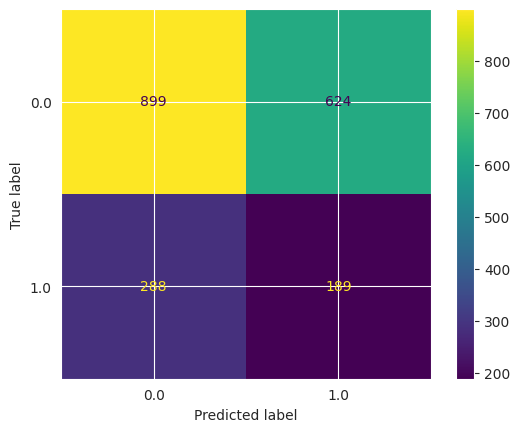

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, normalize = None)

Gracias al gr√°fico podemos ver que el m√≥delo ha predicho **acertadamente** 899 veces que los tweet **no contenian profesi√≥n**, se ha equivocado 624.

Con los tweet que **contenian profesi√≥n, acert√≥ 189** veces mientras que su error fue mayor (283). Esto es debido a que ten√≠amos menos datos de profesi√≥n al inicio.

El modelo no es bueno, ya que se equivoca bastante.

In [60]:
# Obtener la importancia de las variables del modelo
importance = model.coef_[0]

In [61]:
# A continuaci√≥n utilizamos esa variable de importancia de variables, junto a los nombres de las caracter√≠sticas almacenadas anteriormente en X_columns, para listar la importancia de cada una de las variables.
# Mostrar el n√∫mero de la caracter√≠stica, con su nombre, y su score de importancia
for i,v in enumerate(importance):
 print('Feature: %0d, Name: %s , Score: %.5f' % (i,X_columns[i],v))


Feature: 0, Name: 100 , Score: -3.53916
Feature: 1, Name: 2020 , Score: -1.26598
Feature: 2, Name: abril , Score: -2.46675
Feature: 3, Name: acaba , Score: 1.26390
Feature: 4, Name: acabar , Score: -1.60702
Feature: 5, Name: actividad , Score: -0.31017
Feature: 6, Name: activos , Score: -4.68296
Feature: 7, Name: actual , Score: -0.16619
Feature: 8, Name: acuerdo , Score: -1.54891
Feature: 9, Name: adem√°s , Score: 4.34049
Feature: 10, Name: afectado , Score: -0.60844
Feature: 11, Name: agua , Score: -3.97313
Feature: 12, Name: ahora , Score: -2.09812
Feature: 13, Name: ah√≠ , Score: -1.39330
Feature: 14, Name: aire , Score: -1.30558
Feature: 15, Name: alarma , Score: 0.18579
Feature: 16, Name: alemania , Score: -2.26390
Feature: 17, Name: alguien , Score: -3.28091
Feature: 18, Name: alta , Score: -1.06303
Feature: 19, Name: amigo , Score: -1.00957
Feature: 20, Name: ancianos , Score: 0.97540
Feature: 21, Name: andaluc√≠a , Score: -0.66749
Feature: 22, Name: anticuerpos , Score: -2.953

Podemos ver las variables que m√°s importancia tienen cuando se menciona a un profesional son, por ejemplo:

- Feature: 337, Name: m√©dico , Score: 22.22971
- Feature: 547, Name: trabajadore , Score: 17.81058
- Feature: 481, Name: sanitario , Score: 13.35793
- Feature: 392, Name: personal , Score: 10.07754


Las que tiene menos importancia para nuestro modelo son por ejemplo:

- Feature: 596, Name: √∫ltimas , Score: -5.78314
- Feature: 567, Name: usa , Score: -2.67423
- Feature: 537, Name: todas , Score: -5.37558

Las que tiene **menos importancia** son **verbos o sustantivos**.